In [53]:
def compute_HU_frequency(dataX,dataY,HU_range_lowest,HU_range_highest, HU_window,crop_ratio,method):
    freq = np.zeros((len(dataX),int((HU_window*(HU_range_highest-HU_range_lowest)-(HU_window-2)*(HU_window-1)/2+1))))
    pix = np.zeros((len(dataX),int((HU_window*(HU_range_highest-HU_range_lowest)-(HU_window-2)*(HU_window-1)/2+1))))
    rng=[]
    for p in range(len(dataX)):
        for s in range(dataX[p].shape[0]):
            x=dataX[p][s,:,:].flatten()
            for w in range(HU_window):
                i=0
                for r in range(int((w*((HU_range_highest-HU_range_lowest)+1)-w*(w-1)/2)),int((w+1)*((HU_range_highest-HU_range_lowest)+1)-w*(w+1)/2)):              
                    count=np.sum((x>=HU_range_lowest+i)&(x<=HU_range_lowest+i+w))
                    if method == 'avg':
                        freq[p,r] += count
                        #pix[p,r] += dataX[p].shape[1]*dataX[p].shape[2]
                        pix[p,r] += len(x)
                    if method == 'max':
                        if count> freq[p,r]:
                            freq[p,r] = count
                            pix[p,r] = (dataX[p].shape[2])
                    if (p==0)&(s==0):
                        rng.append([HU_range_lowest+i,HU_range_lowest+i+w]) 
                    i+=1          
    metric_1=[]
    metric_2=[]
    metric_3=[]
    metric_4=[]
    dfy = pd.DataFrame(dataY)
    dataY_r = np.logical_not(dataY).astype(int)
    ind_cases = dfy.index[np.where(dfy[0]==1)]
    ind_control = dfy.index[np.where(dfy[0]==0)]
    for i in range(freq.shape[1]):
        data=freq[:,i]/pix[:,i]
        data[np.where(np.isnan(data))] = 0               
        metric_1.append(np.square(np.mean(data[ind_cases])-np.mean(data[ind_control]))/(np.var(data[ind_cases])+np.var(data[ind_control])))
        metric_2.append(roc_auc_score(dataY, data))
        metric_3.append(roc_auc_score(dataY_r, data))
        try:
            U1, p = mannwhitneyu(data[ind_cases], data[ind_control])
        except ValueError:
            U1, p = 'none','identical'
        metric_4.append(p)
    return rng,freq/pix, metric_1,metric_2,metric_3,metric_4


In [54]:
import pickle
import numpy as np
import pandas as pd
file_name = "single_globe_volume.pkl"
open_file = open(file_name, "rb")
CT1 = pickle.load(open_file)
open_file.close()
#globe'u standardize edecek miyiz?
#file_name = "dataX_new_xy_same_newdata.pkl"
file_name = "single_globe_volume_newdata.pkl"
open_file = open(file_name, "rb")
CT2 = pickle.load(open_file)
open_file.close()
ct=CT1+CT2
#print(len(CT))

file_name = "single_globe_volume_labels.pkl"
open_file = open(file_name, "rb")
y1 = pickle.load(open_file)
open_file.close()
file_name = "single_globe_volume_labels_newdata.pkl"
open_file = open(file_name, "rb")
y2 = pickle.load(open_file)
open_file.close()
#y = df['Outcome']
y=y1+y2
y = np.array(y)

outcome = pd.read_csv('globe_label.csv')
outcome=outcome.iloc[:570,:]
#sub1_index_1 =outcome.index[(outcome['sel'] == 1)&(outcome['Age'] <= 3)&(outcome['Slice Thickness p'] >= 4)&(outcome['wc p'] >= 40)&(outcome['ww p'] >= 70)&(outcome['ww p'] <= 80)&(outcome['intercept p'] == 0)].tolist()
sub1_index_1 =outcome.index[(outcome['sel'] == 1)&(outcome['Age'] <= 3)].tolist()
#sub1_index_1 =outcome.index[(outcome['n_slices_right b'] > 0)&(outcome['border_c b'] == 1)&(outcome['Age'] <= 3)&(outcome['ww b'] == 2700)&(outcome['Slice Thickness p'] >= 4)&(outcome['intercept p'] == 0)].tolist()
sub1_index_1=[x*2 for x in sub1_index_1]
sub1_index_2=[x + 1 for x in sub1_index_1]
sub1_index=np.concatenate([sub1_index_1,sub1_index_2])
sub1_index.sort()

/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [55]:
dataX=[ct[index] for index in sub1_index] 
dataY=[y[index] for index in sub1_index] 
rng,freq, metric_1,metric_2,metric_3,metric_4=compute_HU_frequency(dataX, dataY,-20,100,1,1,'avg') 
rng=pd.DataFrame(rng) 
freq=pd.DataFrame(freq) 
metric_1=pd.DataFrame(metric_1) 
metric_2=pd.DataFrame(metric_2) 
metric_3=pd.DataFrame(metric_3) 
metric_4=pd.DataFrame(metric_4) 
quantitative_result=pd.concat([rng,freq.T,metric_1,metric_2,metric_3,metric_4],axis=1) 
quantitative_result.to_csv('quantitative_result_12_22.csv')

In [80]:
print(sub2)

            1         1         1         1         0         0         0  \
0    0.002298  0.002585  0.004237  0.001967  0.002426  0.002283  0.001567   
1    0.002873  0.001724  0.001513  0.002724  0.002568  0.001776  0.002038   
2    0.001724  0.001436  0.003178  0.001816  0.002949  0.002473  0.002038   
3    0.004309  0.004022  0.002421  0.001513  0.003092  0.002156  0.002038   
4    0.001724  0.002011  0.002119  0.002573  0.002711  0.002283  0.001567   
..        ...       ...       ...       ...       ...       ...       ...   
116  0.000575  0.000575  0.000000  0.000000  0.000904  0.000127  0.000000   
117  0.001149  0.000000  0.000000  0.000151  0.000999  0.000190  0.000157   
118  0.000575  0.000575  0.000000  0.000000  0.000666  0.000698  0.000000   
119  0.000287  0.000000  0.000000  0.000000  0.000904  0.000190  0.000000   
120  0.000575  0.000000  0.000151  0.000000  0.000999  0.000190  0.000000   

            0         0         0  ...         1         1         1  \
0  

In [83]:
outcome1 =outcome[(outcome['sel'] == 1)&(outcome['Age'] <= 3)]
outcome1=outcome1.reset_index(drop=True)
sub1_index_1 =outcome1.index[(outcome1['sel'] == 1)&(outcome1['Age'] <= 3)&((outcome1['Slice Thickness p'] >=4)&(outcome1['Slice Thickness p'] <=6))&(outcome1['intercept p'] ==0)&(outcome1['ww p'] <= 80)&(outcome1['ww p'] >= 70)].tolist()
sub1_index_1=[x*2 for x in sub1_index_1]
sub1_index_2=[x + 1 for x in sub1_index_1]
sub1_index1=np.concatenate([sub1_index_1,sub1_index_2])
sub1_index1.sort()
dataY_sub1=np.array([dataY[index] for index in sub1_index1])
print(dataY_sub1.shape)
sub1_index1=sub1_index1.tolist()
sub1_index1 =[str(x) for x in sub1_index1]
sub11 = pd.read_csv('/Users/fatmagunturkun/Desktop/projects/ICP/dataset/quantitative_result_12_22.csv')
#sub11 = sub11.iloc[:,2:]
sub1 = sub11[sub1_index1]
print(sub1)
print(sub1.shape)
sub1.columns=dataY_sub1
sub1['case_avg'] = sub1[[1]].mean(axis=1)
sub1['control_avg'] = sub1[[0]].mean(axis=1)
sub1['case_std'] = 1.96*sub1[[1]].sem(axis=1)
sub1['control_std'] = 1.96*sub1[[0]].sem(axis=1)

(602,)
            0         1         2         3         4         5         8  \
0    0.002641  0.003130  0.002920  0.001298  0.002811  0.002271  0.000515   
1    0.003130  0.002836  0.002542  0.001460  0.002920  0.002649  0.001030   
2    0.002299  0.002396  0.002596  0.002325  0.003298  0.002109  0.001202   
3    0.003130  0.003228  0.002812  0.001947  0.002974  0.002649  0.001374   
4    0.003374  0.003179  0.002758  0.002271  0.002487  0.002325  0.002060   
..        ...       ...       ...       ...       ...       ...       ...   
116  0.000000  0.000489  0.000108  0.000324  0.000216  0.000108  0.000172   
117  0.000342  0.000147  0.000487  0.000595  0.000378  0.000162  0.000172   
118  0.000391  0.000342  0.000433  0.000433  0.000216  0.000378  0.000687   
119  0.000196  0.000293  0.000108  0.000433  0.000108  0.000216  0.000343   
120  0.000342  0.000391  0.000162  0.000433  0.000433  0.000108  0.000172   

            9        12        13  ...       900       901       902

/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [84]:
sub2_index_1 =outcome1.index[(outcome1['sel'] == 1)&(outcome1['Age'] <= 3)&(outcome1['intercept p'] <0)].tolist()
sub2_index_1=[x*2 for x in sub2_index_1]
sub2_index_2=[x + 1 for x in sub2_index_1]
sub2_index=np.concatenate([sub2_index_1,sub2_index_2])
sub2_index.sort()
#print(sub2_index)
dataY_sub2=np.array([dataY[index] for index in sub2_index])
print(dataY_sub2.shape)
sub2_index=sub2_index.tolist()
sub2_index =[str(x) for x in sub2_index]
#print(sub2_index)
sub22 = pd.read_csv('/Users/fatmagunturkun/Desktop/projects/ICP/dataset/quantitative_result_12_22.csv')
#sub22 = sub22.iloc[:,2:]
sub2 = sub22[sub2_index]
#sub2 = sub2.iloc[0:106,:]
print(sub2.shape)
sub2.columns=dataY_sub2
sub2['case_avg'] = sub2[[1]].mean(axis=1)
sub2['control_avg'] = sub2[[0]].mean(axis=1)
sub2['case_std'] = 1.96*sub2[[1]].sem(axis=1)
sub2['control_std'] = 1.96*sub2[[0]].sem(axis=1)

(288,)
(121, 288)


/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [85]:
sub3_index_1 =outcome1.index[(outcome1['sel'] == 1)&(outcome1['Age'] <= 3)&(outcome1['ww p'] > 80)].tolist()
sub3_index_1=[x*2 for x in sub3_index_1]
sub3_index_2=[x + 1 for x in sub3_index_1]
sub3_index=np.concatenate([sub3_index_1,sub3_index_2])
sub3_index.sort()
#print(sub2_index)
dataY_sub3=np.array([dataY[index] for index in sub3_index])
print(dataY_sub3.shape)
sub3_index=sub3_index.tolist()
sub3_index =[str(x) for x in sub3_index]
#print(sub2_index)
sub33 = pd.read_csv('/Users/fatmagunturkun/Desktop/projects/ICP/dataset/quantitative_result_12_22.csv')
#sub33 = sub33.iloc[:,2:]
sub3 = sub33[sub3_index]
#sub3 = sub3.iloc[0:106,:]
print(sub3.shape)
sub3.columns=dataY_sub3
sub3['case_avg'] = sub3[[1]].mean(axis=1)
sub3['control_avg'] = sub3[[0]].mean(axis=1)
sub3['case_std'] = 1.96*sub3[[1]].sem(axis=1)
sub3['control_std'] = 1.96*sub3[[0]].sem(axis=1)

(74,)
(121, 74)


/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [86]:
sub4_index_1 =outcome1.index[(outcome1['sel'] == 1)&(outcome1['Age'] <= 3)&((outcome1['Slice Thickness p'] >6)|(outcome1['Slice Thickness p'] <4))].tolist()
sub4_index_1=[x*2 for x in sub4_index_1]
sub4_index_2=[x + 1 for x in sub4_index_1]
sub4_index=np.concatenate([sub4_index_1,sub4_index_2])
sub4_index.sort()
#print(sub2_index)
dataY_sub4=np.array([dataY[index] for index in sub4_index])
print(dataY_sub4.shape)
sub4_index=sub4_index.tolist()
sub4_index =[str(x) for x in sub4_index]
#print(sub2_index)
sub44 = pd.read_csv('/Users/fatmagunturkun/Desktop/projects/ICP/dataset/quantitative_result_12_22.csv')
#sub44 = sub44.iloc[:,2:]
sub4 = sub44[sub4_index]
#sub4 = sub4.iloc[0:106,:]
print(sub4.shape)
sub4.columns=dataY_sub4
sub4['case_avg'] = sub4[[1]].mean(axis=1)
sub4['control_avg'] = sub4[[0]].mean(axis=1)
sub4['case_std'] = 1.96*sub4[[1]].sem(axis=1)
sub4['control_std'] = 1.96*sub4[[0]].sem(axis=1)

(60,)
(121, 60)


/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/fatmagunturkun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

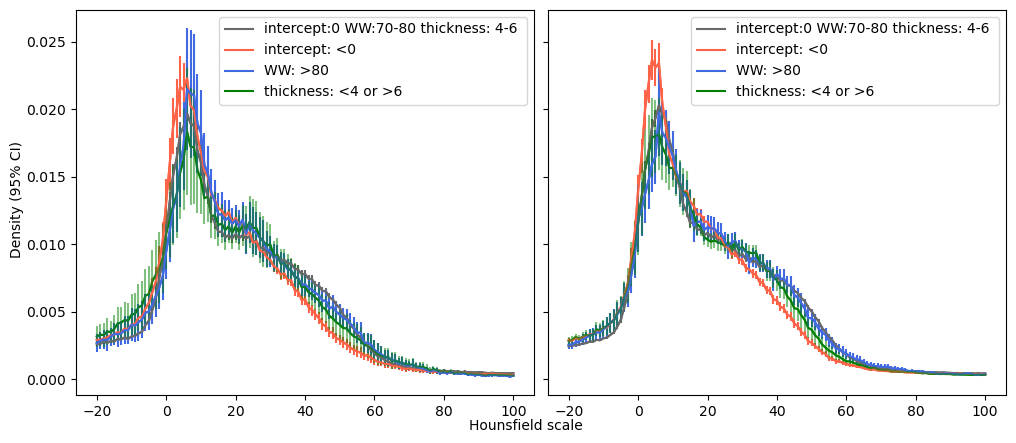

In [94]:
#whole globe
# import require modules
import numpy as np
import matplotlib.pyplot as plt
 
 
# defining our function
fig, ax = plt.subplots(1, 2,sharey=True,figsize=(12,5))
fig.text(0.5, 0.04, 'Hounsfield scale', ha='center')
fig.text(0.07, 0.5, 'Density (95% CI)', va='center', rotation='vertical')
x = np.arange(-20,101)
y_case = sub1['case_avg']
y_case_1024 = sub2['case_avg']
y_case_4000 = sub3['case_avg']
y_case_25 = sub4['case_avg']
# defining our error
y_error_case = sub1['case_std']
y_error_case_1024 = sub2['case_std']
y_error_case_4000 = sub3['case_std']
y_error_case_25 = sub4['case_std']

y_control = sub1['control_avg']
y_control_1024 = sub2['control_avg']
y_control_4000 = sub3['control_avg']
y_control_25 = sub4['control_avg']
# defining our error
y_error_control = sub1['control_std']
y_error_control_1024 = sub2['control_std']
y_error_control_4000 = sub3['control_std']
y_error_control_25 = sub4['control_std']
#my_xticks = ['n=60','n=120','n=180','n=240', 'n=304']
#plt.xlabel("Hounsfield scale")
#plt.ylabel("Density (std)")
#plt.xticks(x, my_xticks)
# ploting our function and
# error bar
ax[0].plot(x, y_case,  color = 'dimgray',label ='intercept:0 WW:70-80 thickness: 4-6 ')
ax[0].plot(x, y_case_1024,  color = 'tomato',label ='intercept: <0')
ax[0].plot(x, y_case_4000,  color = 'royalblue',label ='WW: >80')
ax[0].plot(x, y_case_25,  color = 'green',label ='thickness: <4 or >6')
ax[0].errorbar(x, y_case, yerr = y_error_case, color = 'dimgray')
ax[0].errorbar(x, y_case_1024, yerr = y_error_case_1024, color = 'tomato')
ax[0].errorbar(x, y_case_4000, yerr = y_error_case_4000, color = 'royalblue')
ax[0].errorbar(x, y_case_25, yerr = y_error_case_25, color = 'green',alpha=0.5)
ax[0].legend(loc='upper right')
#plt.annotate(str(0.52),xy=(-0.2,0.54), fontsize=12,fontweight='bold')
#plt.annotate(str(0.60),xy=(0.8,0.62), fontsize=12,fontweight='bold')
#plt.annotate(str(0.70),xy=(1.8,0.72), fontsize=12,fontweight='bold')
#plt.annotate(str(0.81),xy=(2.8,0.83), fontsize=12,fontweight='bold')
#plt.annotate(str(0.87),xy=(3.8,0.89), fontsize=12,fontweight='bold')

ax[1].plot(x, y_control,  color = 'dimgray',label ='intercept:0 WW:70-80 thickness: 4-6 ')
ax[1].plot(x, y_control_1024,  color = 'tomato',label ='intercept: <0')
ax[1].plot(x, y_control_4000,  color = 'royalblue',label ='WW: >80')
ax[1].plot(x, y_control_25,  color = 'green',label ='thickness: <4 or >6')
ax[1].errorbar(x, y_control, yerr = y_error_control, color = 'dimgray')
ax[1].errorbar(x, y_control_1024, yerr = y_error_control_1024, color = 'tomato')
ax[1].errorbar(x, y_control_4000, yerr = y_error_control_4000, color = 'royalblue')
ax[1].errorbar(x, y_control_25, yerr = y_error_control_25, color = 'green',alpha=0.5)
ax[1].legend(loc='upper right')
plt.subplots_adjust(wspace=0.03, hspace=0)
#ax[1].legend(loc ="upper right")